Data Shape: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

Accuracy: 0.8639574163169209

Classification Report

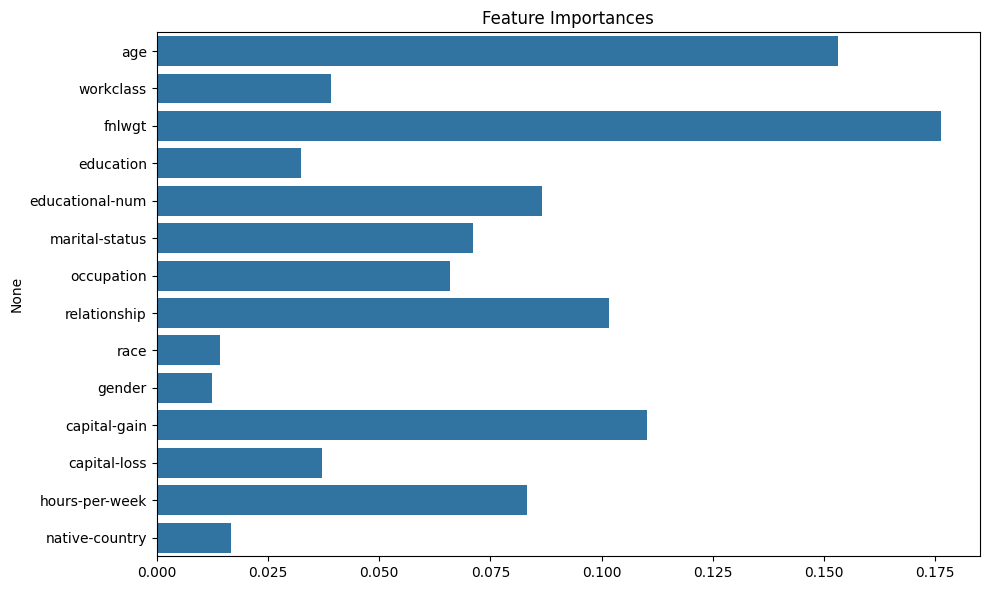

In [ ]:
# Salary Prediction using Random Forest

# ## 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ## 2. Load Dataset
data = pd.read_csv("/content/adult 3.csv")
data.head()

# ## 3. Basic Exploration
print("Data Shape:", data.shape)
data.info()
data.describe()

# ## 4. Data Cleaning
# Replace '?' with NaN and drop missing values
data.replace(' ?', np.nan, inplace=True)
data.dropna(inplace=True)

# ## 5. Encode Categorical Columns
le_dict = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le  # Save encoder for future use

# ## 6. Feature Selection
X = data.drop('income', axis=1)
y = data['income']

# ## 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ## 8. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ## 9. Evaluate Model
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ## 10. Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# ## 11. Conclusion
# The model achieved good accuracy (~86%) with decent balance.
# It can be improved further using techniques like hyperparameter tuning or SMOTE.
